2
2
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
정답 : 2
정답 유니크 : [0 1 2 3 4 5 6 7 8 9]
유니크 카운트 : [6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]


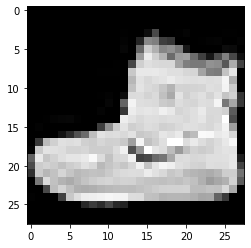

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

data = fashion_mnist.load_data()

# 이중구조
print(len(data[0]))
print(len(data[1]))

# 이중튜플로 나누기
(X_train, y_train),(X_test,y_test) = data

# 6만장, 28*28 px
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# 데이터 시각화
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap="gray") # cmap: gray 흑백
print(f"정답 : {y_train[15000]}") # 정답 분류
print(f"정답 유니크 : {np.unique(y_train)}") 
print(f"유니크 카운트 : {np.bincount(y_train)}") 

In [ ]:
#plt.hist(X_train[0])
plt.show()

In [ ]:
# 모델 설계 준비
from tensorflow.python.keras.engine.input_layer import InputLayer
from tensorflow.keras import Sequential # 핵심
from tensorflow.keras.layers import Dense, InputLayer, Flatten
from tensorflow.keras.utils import to_categorical # 다중분류

## 다중분류 시 정답데이터를 반드시 확률정보로 바꾸어야 학습을 시킬 수 있다. *****
print(f"정답 :{y_train[:10]}")
print(f"{to_categorical(y_train[:10])}") # 원핫인코딩과 비슷한 구조 / 10 종류 = 10 개의 선 = 10 개의 확률

# 다중분류로 정답데이터 분류
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

정답 :[9 0 0 3 0 2 7 2 5 5]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [ ]:
# 모델 구조 설계
mnist_model = Sequential()
mnist_model.add(InputLayer(input_shape=(28,28))) # (sample, 가로px, 세로px, 색상수3)
# CNN 2차원 데이터를 처리하는 알고리즘이 중간에 들어온다
mnist_model.add(Flatten()) # 데이터를 1차원으로 평평하게 만들어주는 레이어
mnist_model.add(Dense(32, activation="sigmoid"))
mnist_model.add(Dense(64, activation="sigmoid"))
mnist_model.add(Dense(128, activation="sigmoid"))
mnist_model.add(Dense(64, activation="sigmoid"))
mnist_model.add(Dense(32, activation="sigmoid"))
# 출력층 / 다중분류 시 유니크 값에 해당하는 총 10개의 확률값이 필요하다.
mnist_model.add(Dense(10, activation="softmax")) # softmax : 현재/전체 데이터 비율 >> 사람이 보기 쉽게 합산을 1.0 으로 만들어 줌 / 출력층

# 학습/평가 방법 설정
mnist_model.compile(loss="sparse_categorical_crossentropy", # sparse_categorical_crossentropy : 내부에서 확률을 계산해주는 친구
                      # sparse 를 사용하지 않다면 학습에서 y_train_one_hot 을 사용해야 한다. (확률형)
                    optimizer="Adam", # default : GD / Adam : 최신 버전
                    metrics=["accuracy"]) # metrics : 정확도를 보여 줌

# 학습
mnist_history = mnist_model.fit(X_train, y_train,
                validation_split=0.3, # 학습과 검증 분리 7:3
                epochs=100)

Epoch 1/100
1313/1313 [==============================] - 11s 8ms/step - loss: 1.5592 - accuracy: 0.3430 - val_loss: 1.2106 - val_accuracy: 0.4444
Epoch 2/100
1313/1313 [==============================] - 6s 4ms/step - loss: 1.1629 - accuracy: 0.4998 - val_loss: 1.1316 - val_accuracy: 0.5437
Epoch 3/100
1313/1313 [==============================] - 4s 3ms/step - loss: 1.0922 - accuracy: 0.5628 - val_loss: 0.9829 - val_accuracy: 0.6227
Epoch 4/100
1313/1313 [==============================] - 4s 3ms/step - loss: 0.9932 - accuracy: 0.5989 - val_loss: 0.9202 - val_accuracy: 0.6378
Epoch 5/100
1313/1313 [==============================] - 4s 3ms/step - loss: 0.9650 - accuracy: 0.6254 - val_loss: 0.9485 - val_accuracy: 0.6143
Epoch 6/100
1313/1313 [==============================] - 4s 3ms/step - loss: 1.0164 - accuracy: 0.5960 - val_loss: 0.9850 - val_accuracy: 0.6319
Epoch 7/100
1313/1313 [==============================] - 4s 3ms/step - loss: 0.9814 - accuracy: 0.6280 - val_loss: 0.8944 - val_a

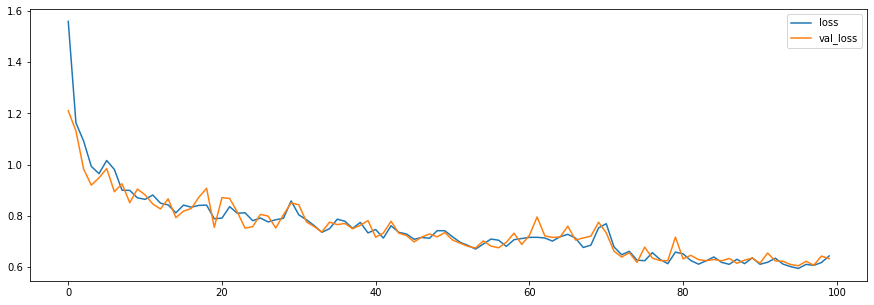

In [ ]:
# 시각화
plt.figure(figsize=(15,5))
plt.plot(mnist_history.history["loss"],label="loss")
plt.plot(mnist_history.history["val_loss"],label="val_loss") # 과대적합 여부를 확인하기 위해 검증 데이터도 그래프 시각화
plt.legend()
plt.show()

In [ ]:
# 모델 평가
mnist_model.evaluate(X_test, y_test_one_hot)

ValueError: ignored

In [ ]:
!df -h # 할당량 확인 /dev/sda1  Size 총량 Avail 할당량

Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   42G   66G  39% /
tmpfs            64M     0   64M   0% /dev
shm             5.8G     0  5.8G   0% /dev/shm
/dev/root       2.0G  1.2G  817M  59% /sbin/docker-init
tmpfs           6.4G   40K  6.4G   1% /var/colab
/dev/sda1        81G   46G   36G  57% /etc/hosts
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [ ]:
# 모델 저장
mnist_model.save("my_fasion_mode.h5") 

In [ ]:
# 모델 로드
from tensorflow.keras.models import load_model

m = load_model("./my_fashion_mode.h5")

m.predict(X_test[100:102]) # 100, 101 번째 예측하기

OSError: ignored

In [ ]:
|